In [1]:
import json
import pandas as pd
import seaborn as sns

from collections import Counter

In [2]:
stream = json.load(open("crawler/products.json"))

In [3]:
keys = Counter()
for item in stream:
    keys.update(item.keys())
keys

Counter({'product': 409,
         'serialnumber': 409,
         'price': 409,
         'Képátló': 406,
         'Képernyő típus': 361,
         'Képernyő felbontás': 402,
         'Smart': 366,
         'USB portok száma': 351,
         'HDMI csatlakozók száma': 360,
         'Betekintési szög': 52,
         'Képfrissítés': 236,
         'Magasság': 286,
         'Szélesség': 287,
         'Mélység': 287,
         'Energiaosztály': 355,
         'Szín': 289,
         'USB csatlakozó': 370,
         'WiFi': 382,
         'Csatlakozók': 223,
         'Súly': 240,
         'Tuner típusa': 105,
         'Egyéb jellemzők': 36,
         'Ívelt kijelző': 13,
         'MKV videó formátum': 38,
         'Hangfal típus': 101,
         'USB portok száma ': 1,
         ' HDMI csatlakozók száma': 1,
         'USB-ről lejátszható formátumok': 1,
         'Kijelző típusa': 1,
         'Kijelző méret': 1,
         'Képarány': 1,
         'Kijelző felbontása': 1,
         'Tulajdonságok': 1,
         '

In [4]:
set(key.strip() for key in keys)

{'Betekintési szög',
 'Csatlakozók',
 'Egyéb jellemzők',
 'Energiaosztály',
 'HDMI csatlakozók száma',
 'Hangfal típus',
 'Kijelző felbontása',
 'Kijelző méret',
 'Kijelző típusa',
 'Képarány',
 'Képernyő felbontás',
 'Képernyő típus',
 'Képfrissítés',
 'Képátló',
 'MKV videó formátum',
 'Magasság',
 'Mélység',
 'Smart',
 'Szélesség',
 'Szín',
 'Súly',
 'Tulajdonságok',
 'Tuner típusa',
 'USB csatlakozó',
 'USB portok száma',
 'USB-ről lejátszható formátumok',
 'Válaszidő',
 'WiFi',
 'price',
 'product',
 'serialnumber',
 'Ívelt kijelző'}

In [5]:
translate_dict = {
    'Betekintési szög': "display_viewangle",
    'Csatlakozók': "plugins",
    'Egyéb jellemzők': "other",
    'Energiaosztály': "energyclass",
    'HDMI csatlakozók száma': "num_hdmi",
    'Hangfal típus': "sound",
    'Kijelző felbontása': "display_resolution",
    'Kijelző méret': "display_size",
    'Kijelző típusa': "display_type",
    'Képarány': "display_ratio",
    'Képernyő felbontás': "display_resolution",
    'Képernyő típus': "display_type",
    'Képfrissítés': "display_updaterate",
    'Képátló': "display_size",
    'MKV videó formátum': "format_mkv",
    'Magasság': "dim_height",
    'Mélység': "dim_depth",
    'Smart': "smart",
    'Szélesség': "dim_width",
    'Szín': "dim_color",
    'Súly': "dim_weight",
    'Tulajdonságok': "properties",
    'Tuner típusa': "tuner",
    'USB csatlakozó': "usb",
    'USB portok száma': "num_usb",
    'USB-ről lejátszható formátumok': "format_usb",
    'Válaszidő': "display_responsetime",
    'WiFi': "wifi",
    'Ívelt kijelző': "display_curved",
}

In [6]:
records = []
for item in stream:
    record = {}
    for key in item:
        if key.strip() in translate_dict:
            new_key = translate_dict[key.strip()]
            record[new_key] = item[key]
        else: # self-defined variables: product,serialnumber,price
            record[key] = item[key]
    records.append(record)

In [7]:
table = pd.DataFrame.from_records(records)

In [8]:
table.head()

,product,serialnumber,price,display_size,display_type,display_resolution,smart,num_usb,num_hdmi,display_viewangle,...,dim_weight,tuner,other,display_curved,format_mkv,sound,format_usb,display_ratio,properties,display_responsetime
0,"TCL 43P735 43"" 4K Smart TV",274435,119998.998,43 inch,LCD,4K,Igen,1 db,3 db,178 °C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"LG 55NANO783QA NanoCell Smart TV 4K UHD, HDR, ...",276494,199999.0031,55 inch,NANOCELL,Ultra HD,Igen,2 db,3 db,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Hisense 43A63H 4K UHD Smart LED TV, 108 cm",275834,109999.0053,43 inch,LED,Ultra HD,Igen,2 db,3 db,178 °C,...,"7,5 kg",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Dyras 32"" HD LED Televízió (BL-32G12EU)",271832,47999.0023,32 inch,LED,HD Ready,NaN,2 db,2 db,NaN,...,"3,9 kg",DVB-T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Samsung UE65AU7022KXXH 65"" Crystal 4K UHD Smar...",274692,194999.0004,65 inch,LED,"4K, Ultra HD",Igen,1 db,3 db,NaN,...,"19,6 kg",DVB-T2C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
table.shape

(409, 29)

In [10]:
table.columns

Index(['product', 'serialnumber', 'price', 'display_size', 'display_type',
       'display_resolution', 'smart', 'num_usb', 'num_hdmi',
       'display_viewangle', 'display_updaterate', 'dim_height', 'dim_width',
       'dim_depth', 'energyclass', 'dim_color', 'usb', 'wifi', 'plugins',
       'dim_weight', 'tuner', 'other', 'display_curved', 'format_mkv', 'sound',
       'format_usb', 'display_ratio', 'properties', 'display_responsetime'],
      dtype='object')

In [11]:
table.isna().sum().sort_values()

product                   0
serialnumber              0
price                     0
display_size              1
display_resolution        6
wifi                     25
usb                      39
smart                    41
display_type             46
num_hdmi                 48
energyclass              54
num_usb                  57
dim_color               120
dim_height              122
dim_width               122
dim_depth               122
dim_weight              169
display_updaterate      173
plugins                 186
tuner                   304
sound                   308
display_viewangle       357
format_mkv              371
other                   373
display_curved          396
properties              408
format_usb              408
display_ratio           408
display_responsetime    408
dtype: int64

In [12]:
# drop immediately where more nans than not
drop_cols = ["tuner","sound","display_viewangle","format_mkv","other","display_curved","properties","format_usb","display_ratio","display_responsetime"]
table = table.drop(columns=drop_cols)

In [13]:
table.dtypes

product               object
serialnumber          object
price                 object
display_size          object
display_type          object
display_resolution    object
smart                 object
num_usb               object
num_hdmi              object
display_updaterate    object
dim_height            object
dim_width             object
dim_depth             object
energyclass           object
dim_color             object
usb                   object
wifi                  object
plugins               object
dim_weight            object
dtype: object

In [14]:
# print unique values to check necessary preprocessing steps
for col in table.columns:
    if col in ['product', 'serialnumber', 'price', 'other', 'plugins']:
        continue
    print(table[col].value_counts(dropna=False))
    print('\n')

display_size
65 inch      88
55 inch      86
75 inch      52
43 inch      44
50 inch      41
32 inch      27
85 inch      18
40 inch       8
48 inch       7
77 inch       6
86 inch       4
24 inch       4
42 inch       3
83 inch       3
58 inch       2
23,6 inch     2
88 inch       2
70 inch       2
23 inch       1
82 inch       1
39,5 inch     1
64,5 inch     1
NaN           1
164 cm        1
100 inch      1
125 inch      1
27,5 inch     1
66 inch       1
Name: count, dtype: int64


display_type
LED                     139
QLED                    107
OLED                     59
NaN                      46
NANOCELL                 16
QNED                     12
LCD                      11
LCD, LED                  5
ULED                      5
MiniLED, ULED             3
Direct LED, NANOCELL      2
Direct LED, LCD           2
TN                        1
Direct LED                1
Name: count, dtype: int64


display_resolution
4K                        223
Ultra HD                   69

# Preprocessing

In [15]:
TABLE_COLS = {}

## Numerical values

In [17]:
float_cols = [
    "display_size", 
    "dim_height",
    "dim_width",
    "dim_depth",
    "dim_weight",
]

In [18]:
# inch and cm in display_size
for col in float_cols:
    print(table[col].dropna().apply(lambda s: s.split(" ")[-1]).value_counts(),end='\n\n')

display_size
inch    407
cm        1
Name: count, dtype: int64

dim_height
cm    287
Name: count, dtype: int64

dim_width
cm    287
Name: count, dtype: int64

dim_depth
cm    287
Name: count, dtype: int64

dim_weight
kg    240
Name: count, dtype: int64



In [19]:
for col in float_cols:
    print(col)
    if col == "display_size":
        continue
    values = []
    for item in table[col]:
        if pd.isna(item):
            values.append(None)
            continue
        value, _ = item.split(" ")
        value = float(".".join(value.split(",")))
        values.append(value)
    TABLE_COLS[col] = values

display_size
dim_height
dim_width
dim_depth
dim_weight


In [20]:
cm2inch = lambda i: i*0.3937008

In [21]:
col = "display_size"
print(col)

values = []
for item in table[col]:
    if pd.isna(item):
        values.append(None)
        continue
    value, unit = item.split(" ")
    value = float(".".join(value.split(",")))
    if unit == "cm":
        value = cm2inch(value)
    values.append(value)
TABLE_COLS[col] = values

display_size


In [22]:
int_cols = ["num_usb","num_hdmi"]

for col in int_cols:
    print(col)
    values = []
    for item in table[col]:
        if pd.isna(item):
            values.append(None)
            continue
        value = int( item.split(" ")[0] )
        values.append(value)
    TABLE_COLS[col] = values

num_usb
num_hdmi


In [23]:
pd.DataFrame.from_dict(TABLE_COLS)

,dim_height,dim_width,dim_depth,dim_weight,display_size,num_usb,num_hdmi
0,56.00,95.70,4.40,NaN,43.0,1.0,3.0
1,78.80,123.50,26.00,NaN,55.0,2.0,3.0
2,NaN,NaN,NaN,7.5,43.0,2.0,3.0
3,46.90,73.00,18.80,3.9,32.0,2.0,2.0
4,91.58,144.75,30.85,19.6,65.0,1.0,3.0
...,...,...,...,...,...,...,...
404,102.80,98.60,41.70,17.4,43.0,2.0,4.0
405,70.40,122.60,4.40,NaN,55.0,1.0,3.0
406,48.00,73.20,17.50,4.5,32.0,1.0,2.0
407,46.40,73.60,18.00,NaN,32.0,NaN,2.0


## Label encoding

In [24]:
label_encoder = { 
    "display_type": ["TN", "LCD", "LED", "OLED", "QLED", "NANOCELL", "QNED"][::-1], # best to worst
    "energyclass": ["A","B","C","D","E","F","G"], # best to worst
    "display_resolution": ["HD", "Full HD", "4K", "8K"][::-1], # best to worst [720,1080,2160,4320]
    "dim_color": ["Fehér","Ezüst","Szürke","Bézs","Korall","Kék","Fekete"], # brightest to darkest
}

In [25]:
for col in label_encoder:
    print(col)
    if col == "display_resolution":
        table[col] = table[col].apply(lambda s: s+" 4K" if ( (not pd.isna(s)) and ("Ultra HD" in s) ) else s)
    values = []
    technology = label_encoder[col]
    for item in table[col]:
        if pd.isna(item):
            values.append(None)
        else:
            value = None
            for idx, tech in enumerate(technology):
                if tech in item:
                    value = idx # the less the better
                    break
            values.append(value) 
    TABLE_COLS[col] = values

display_type
energyclass
display_resolution
dim_color


In [26]:
pd.DataFrame.from_dict(TABLE_COLS)

,dim_height,dim_width,dim_depth,dim_weight,display_size,num_usb,num_hdmi,display_type,energyclass,display_resolution,dim_color
0,56.00,95.70,4.40,NaN,43.0,1.0,3.0,5.0,5.0,1.0,6.0
1,78.80,123.50,26.00,NaN,55.0,2.0,3.0,1.0,NaN,1.0,NaN
2,NaN,NaN,NaN,7.5,43.0,2.0,3.0,4.0,5.0,1.0,6.0
3,46.90,73.00,18.80,3.9,32.0,2.0,2.0,4.0,5.0,3.0,6.0
4,91.58,144.75,30.85,19.6,65.0,1.0,3.0,4.0,5.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
404,102.80,98.60,41.70,17.4,43.0,2.0,4.0,2.0,NaN,1.0,0.0
405,70.40,122.60,4.40,NaN,55.0,1.0,3.0,5.0,5.0,1.0,6.0
406,48.00,73.20,17.50,4.5,32.0,1.0,2.0,4.0,5.0,3.0,6.0
407,46.40,73.60,18.00,NaN,32.0,NaN,2.0,4.0,4.0,3.0,6.0


## Binary encode

In [27]:
binary_cols = ["smart","usb","wifi"]

In [28]:
for col in binary_cols:
    print(table[col].value_counts(dropna=False), end='\n\n')

smart
Igen    366
NaN      41
Nem       2
Name: count, dtype: int64

usb
Igen    369
NaN      39
Nem       1
Name: count, dtype: int64

wifi
Igen    382
NaN      25
Nem       2
Name: count, dtype: int64



In [29]:
table[["smart","wifi"]].value_counts(dropna=False)

smart  wifi
Igen   Igen    356
NaN    Igen     26
       NaN      14
Igen   NaN      10
Nem    Nem       1
       NaN       1
NaN    Nem       1
Name: count, dtype: int64

In [30]:
for col in binary_cols:
    print(col)
    values = []
    for item in table[col]:
        if pd.isna(item):
            values.append(0)
        elif "Igen" in item:
            values.append(1)
        else:
            values.append(0)
    TABLE_COLS[col] = values

smart
usb
wifi


In [31]:
pd.DataFrame.from_dict(TABLE_COLS)

,dim_height,dim_width,dim_depth,dim_weight,display_size,num_usb,num_hdmi,display_type,energyclass,display_resolution,dim_color,smart,usb,wifi
0,56.00,95.70,4.40,NaN,43.0,1.0,3.0,5.0,5.0,1.0,6.0,1,1,1
1,78.80,123.50,26.00,NaN,55.0,2.0,3.0,1.0,NaN,1.0,NaN,1,1,1
2,NaN,NaN,NaN,7.5,43.0,2.0,3.0,4.0,5.0,1.0,6.0,1,1,1
3,46.90,73.00,18.80,3.9,32.0,2.0,2.0,4.0,5.0,3.0,6.0,0,1,0
4,91.58,144.75,30.85,19.6,65.0,1.0,3.0,4.0,5.0,1.0,6.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,102.80,98.60,41.70,17.4,43.0,2.0,4.0,2.0,NaN,1.0,0.0,1,1,1
405,70.40,122.60,4.40,NaN,55.0,1.0,3.0,5.0,5.0,1.0,6.0,1,1,1
406,48.00,73.20,17.50,4.5,32.0,1.0,2.0,4.0,5.0,3.0,6.0,0,1,0
407,46.40,73.60,18.00,NaN,32.0,NaN,2.0,4.0,4.0,3.0,6.0,1,0,1


## One-hot encode

In [32]:
table["company"] = table["product"].apply(lambda s: s.split(" ")[0].lower())

In [33]:
table["company"].value_counts().index

Index(['samsung', 'lg', 'hisense', 'tcl', 'sony', 'philips', 'panasonic',
       'dyras', 'tesla', 'loewe', 'smart', 'nokia', 'gaba', 'vortex',
       'strong'],
      dtype='object', name='company')

In [34]:
table["company"].value_counts()

company
samsung      140
lg           113
hisense       40
tcl           24
sony          16
philips       15
panasonic     14
dyras         12
tesla         12
loewe         11
smart          6
nokia          3
gaba           1
vortex         1
strong         1
Name: count, dtype: int64

In [36]:
companies_onethot = {
    f"is_company_{key}": [0]*len(table) for key in table["company"].unique()
}

for idx, comp in enumerate(table["company"]):
    if not pd.isna(comp):
        companies_onethot[f"is_company_{comp}"][idx] = 1

company_table = pd.DataFrame.from_dict(
    companies_onethot,
)

company_table

,is_company_tcl,is_company_lg,is_company_hisense,is_company_dyras,is_company_samsung,is_company_sony,is_company_tesla,is_company_philips,is_company_panasonic,is_company_loewe,is_company_gaba,is_company_nokia,is_company_vortex,is_company_smart,is_company_strong
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
405,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
406,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
407,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
all(company_table.sum(axis=1) == 1)

True

# Gather

In [41]:
X = pd.DataFrame.from_dict(TABLE_COLS).join(company_table)

## New features

In [42]:
X["dim_density"] = X["dim_weight"] 
X["dim_density"] /= ( X["dim_height"] * X["dim_width"] * X["dim_depth"] ) # (physical) density

In [79]:
res2pixs_dict = {
    "HD": 1280 * 720, 
    "Full HD": 1920 * 1080, 
    "4K": 3840 * 2160, 
    "8K": 7680 * 4320
}

def resolution2pixel(code):
    try:
        code = int(code)
        tech = label_encoder["display_resolution"][-code-1]
        return res2pixs_dict[tech] / 1000
    except:
        return None

In [62]:
X["display_pixeldensity"] = X["display_resolution"].apply(resolution2pixel)
X["display_pixeldensity"] /= ( X["dim_height"] * X["dim_width"] ) # pixels per area

In [63]:
X["display_relativeenergy"] = X["display_resolution"].apply(resolution2pixel)
X["display_relativeenergy"] /= (X["energyclass"] + 1)

## Target values

In [67]:
X["price"] = table["price"].astype("float")
X["serial_id"] = table["serialnumber"].astype("int")

## Investigate

In [68]:
X.head()

,dim_height,dim_width,dim_depth,dim_weight,display_size,num_usb,num_hdmi,display_type,energyclass,display_resolution,...,is_company_gaba,is_company_nokia,is_company_vortex,is_company_smart,is_company_strong,dim_density,display_pixeldensity,display_relativeenergy,price,serial_id
0,56.00,95.70,4.40,NaN,43.0,1.0,3.0,5.0,5.0,1.0,...,0,0,0,0,0,NaN,0.386923,345.6,119998.9980,274435
1,78.80,123.50,26.00,NaN,55.0,2.0,3.0,1.0,NaN,1.0,...,0,0,0,0,0,NaN,0.213075,NaN,199999.0031,276494
2,NaN,NaN,NaN,7.5,43.0,2.0,3.0,4.0,5.0,1.0,...,0,0,0,0,0,NaN,NaN,345.6,109999.0053,275834
3,46.90,73.00,18.80,3.9,32.0,2.0,2.0,4.0,5.0,3.0,...,0,0,0,0,0,0.000061,9.690569,5529.6,47999.0023,271832
4,91.58,144.75,30.85,19.6,65.0,1.0,3.0,4.0,5.0,1.0,...,0,0,0,0,0,0.000048,0.156425,345.6,194999.0004,274692


In [69]:
pd.DataFrame({
    "dtypes": X.dtypes,
    "num_nans": X.isna().sum()},
    index = X.columns
)

,dtypes,num_nans
dim_height,float64,122
dim_width,float64,122
dim_depth,float64,122
dim_weight,float64,169
display_size,float64,1
num_usb,float64,57
num_hdmi,float64,48
display_type,float64,46
energyclass,float64,54
display_resolution,float64,6


In [70]:
X.to_csv("data/basetable_.csv",index=False)

# Inspect

In [71]:
import numpy as np

<Axes: >

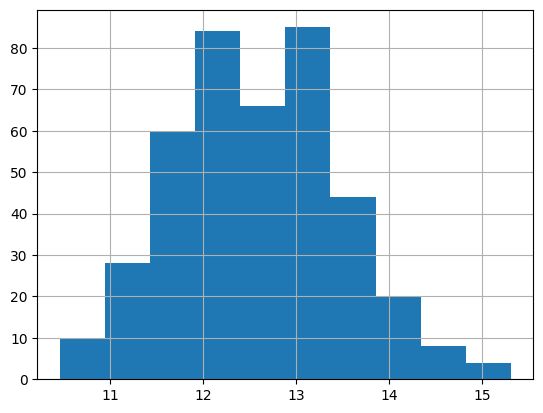

In [72]:
np.log(X["price"]).hist() #lognormal

<Axes: >

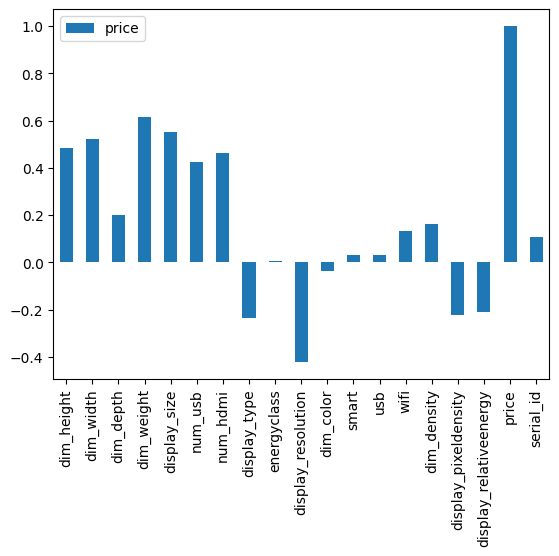

In [73]:
X.corr()[["price"]].loc[[col for col in X.columns if ("is_company" not in col)]].plot.bar()

In [74]:
X["company"] = table.company

<Axes: xlabel='price', ylabel='company'>

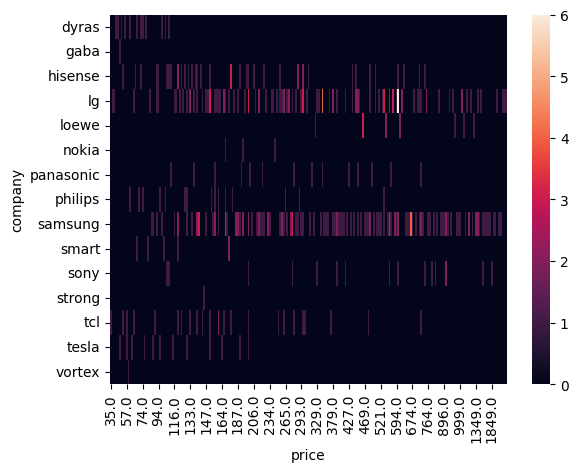

In [78]:
sns.heatmap(pd.crosstab(X.company, X.price // 1_000) )

company
dyras        Axes(0.125,0.11;0.775x0.77)
gaba         Axes(0.125,0.11;0.775x0.77)
hisense      Axes(0.125,0.11;0.775x0.77)
lg           Axes(0.125,0.11;0.775x0.77)
loewe        Axes(0.125,0.11;0.775x0.77)
nokia        Axes(0.125,0.11;0.775x0.77)
panasonic    Axes(0.125,0.11;0.775x0.77)
philips      Axes(0.125,0.11;0.775x0.77)
samsung      Axes(0.125,0.11;0.775x0.77)
smart        Axes(0.125,0.11;0.775x0.77)
sony         Axes(0.125,0.11;0.775x0.77)
strong       Axes(0.125,0.11;0.775x0.77)
tcl          Axes(0.125,0.11;0.775x0.77)
tesla        Axes(0.125,0.11;0.775x0.77)
vortex       Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

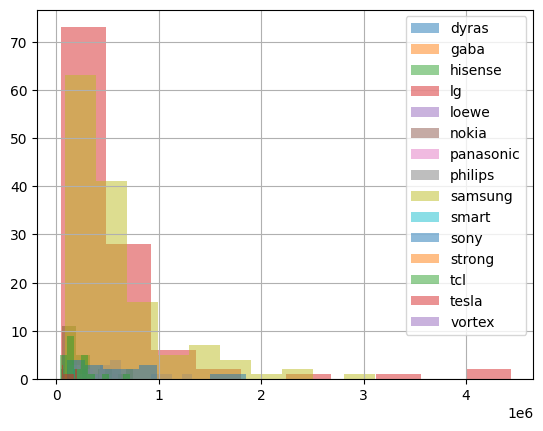

In [76]:
X.groupby("company")["price"].hist(alpha=0.5, legend=True)